### reference
- https://kaggle-kr.tistory.com/17?category=868316

# 타이타닉 튜토리얼

### < 라이브러리 설정 >

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. 
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 
# 일일이 graph 의 font size 를 지정할 필요 없이 
# seaborn 의 font_scale 을 사용하면 편합니다.

# 설치 필요 => pip install missingno
import missingno as msno 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# jupyter에서 plt를 쓰기 위한 용도 => 일반 파이썬을 구동할 때는 에러 발생
%matplotlib inline

### < 데이터셋 읽기 >

In [70]:
# \(이스케이프 문자) : 문자열에 쓰려면 \\로 써야 한다.

# in window
# df_train = pd.read_csv('C:\\Users\\admin\\Desktop\\kaggle_Titanic\\Titanic\\dataset\\train.csv')
# df_test = pd.read_csv('C:\\Users\\admin\\Desktop\\kaggle_Titanic\\Titanic\\dataset\\test.csv')

# in mac - 절대경로 윈도우에서 되나?
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

### < 데이터 셋 확인 >

In [8]:
df_train.head(3) # default n = 5
# target label은 Survived
# Cabin => 선실 번호
# Parch => 부모,자녀 동승 수
# Embarcked => 탑승한 항구? / C = Cherbourg, Q = Queenstown, S = Southampton, NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
df_train.describe()
# feature들의 통계치
# 수치자료만 통계를 낸다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print(df_train.loc[:, "Parch"]) # Parch => # of parents / children aboard the Titanic

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64


In [11]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
#NaN (Null 값)의 퍼센트

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [12]:
df_test.describe()
# 테이블에서 보다시피, 전체인 PassenserID 숫자와 다른, 
# 그러니까 null data가 존재하는 열(feature)가 있는 것 같다.
# -> Age, Fare가 count랑 다르다 -> null값이 있다.
# age에 0.17 ?
# 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)
#NaN (Null 값)의 퍼센트

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


### < 데이터 셋 시각화 >

- Nan 값을 확인하기 위한 시각화

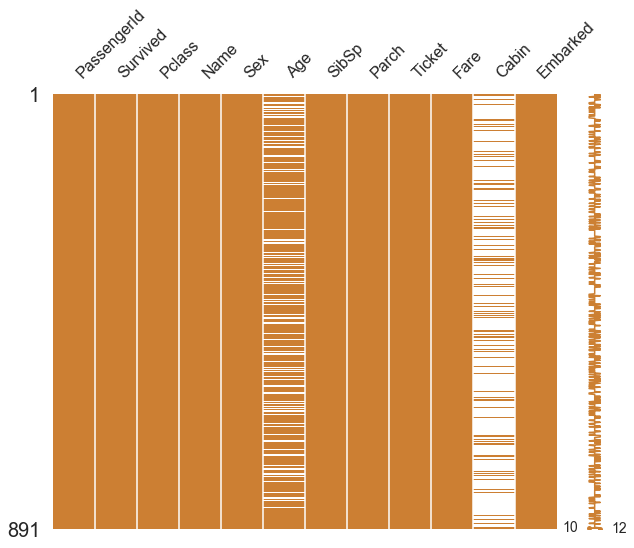

In [14]:
#missingno 라이브러리로 null의 존재 확인 가능 - 시각화
# matrix => 몇번 행에서 null이 있는지 확인 가능
msno.matrix(df=df_train.iloc[:, :], figsize=(10, 8), color=(0.8, 0.5, 0.2))
# Embarked는 왜 저렇게 나오지?

In [15]:
print(df_train['Embarked'].unique())

['S' 'C' 'Q' nan]


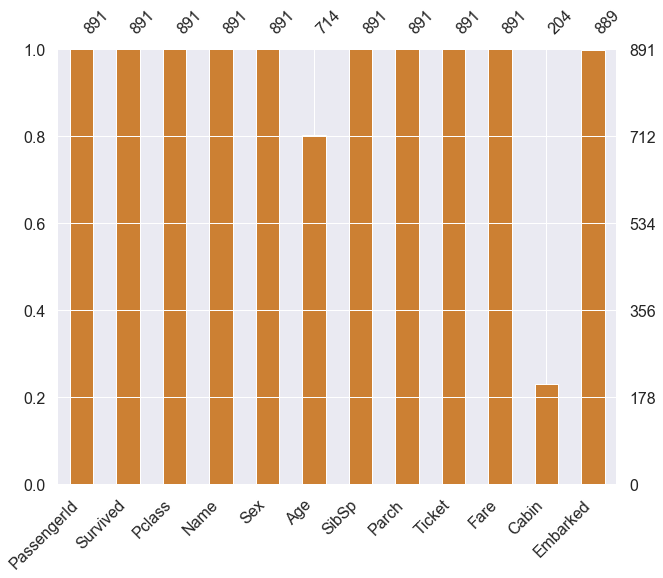

In [16]:
# bar => 정확히 column별로 갯수를 확인할 수 있다.
msno.bar(df=df_train.iloc[:, :], figsize=(10, 8), color=(0.8, 0.5, 0.2))

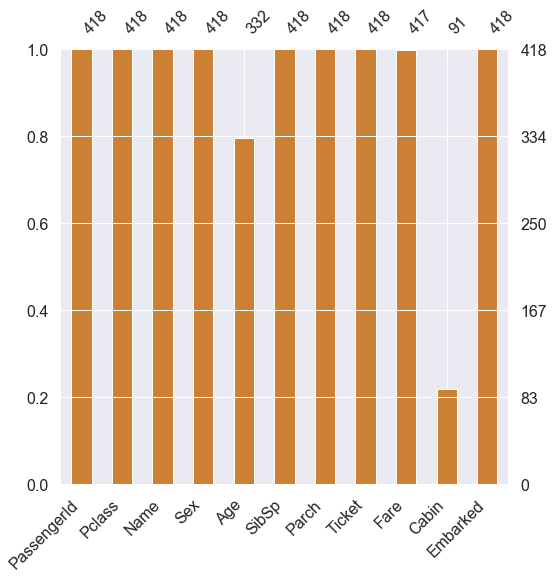

In [17]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### < Target label 확인 >

- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

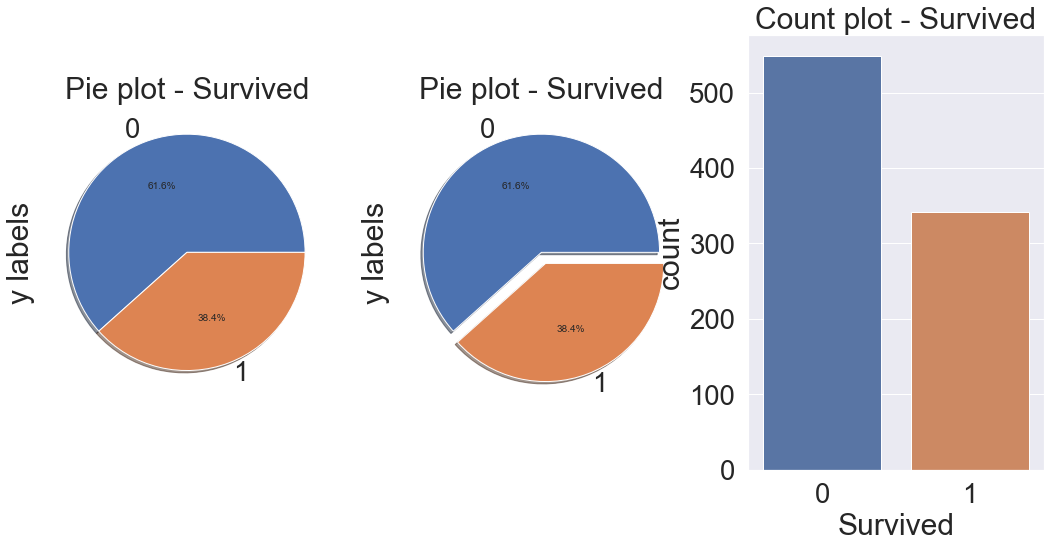

In [18]:
# 예시
f, ax = plt.subplots(1, 3, figsize=(18, 8))
"""
plt.subplots() 편의 함수는 Figure 객체를 생성하고 
Figure.subplots()를 호출하여 리턴
ax 갯수 만큼! 배치
"""
"""
df_train['Survived'].value_counts()의 결과를
plot.pie로 그려라.
explode - 그래프 사이의 거리
autopct - 라벨의 형식 [1.1f -> s]
ax=ax[0] - ax[n] n번째 서브플롯에 넣어라
"""
df_train['Survived'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel("y labels")

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[1].set_title('Pie plot - Survived')
ax[1].set_ylabel("y labels")

# sns => seaborn
sns.countplot('Survived', data=df_train, ax=ax[2])
ax[2].set_title('Count plot - Survived')

plt.show()

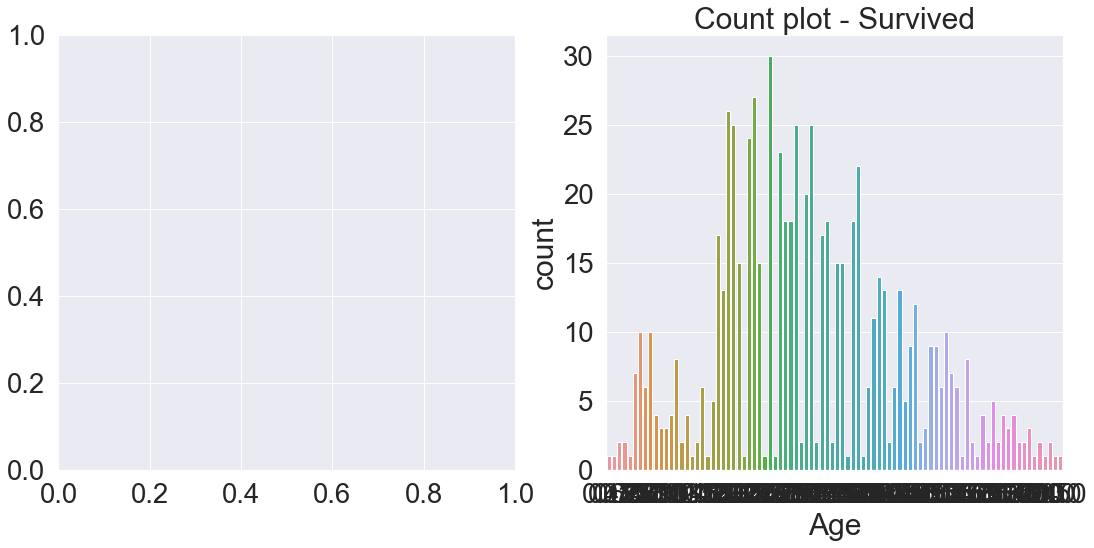

In [26]:
# 예시
f, ax = plt.subplots(1, 2, figsize=(18, 8))
"""
sns -> seaborn, ( countplot / catplot / barplot ...)
<countplot>
data에서 앞의 파라미터 명을 가져와라 그리고 ax에 놓아라

"""
sns.countplot('Age', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## Exploratory data analysis

- 탐색적 데이터 분석
- 적절한 시각화 동반 ( matplotlib, seaborn, plotly )

#### 기준 : Pclass

- ordinary : 서수형 - 카테고리면서 순서가 있는 데이터 타입
    - pandas dataframe의 groupby, pivot 메소드

In [25]:
"""
Pclass 변수와 Survived 변수만 나타내라
"""
df_train[['Pclass', 'Survived']]


,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [26]:
"""
나타낸 것을~
Pclass로 그룹바이해라(기준으로 묶어라).
그리고 카운트해라.
여기서는 전체 갯수!
"""
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [27]:
"""
여기서는 값이 0 or 1이다.
그렇다면 sum을 하면 전체 1의 갯수가 나오게 된다.
"""
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [28]:
"""
pd.crosstab -> pandas의 crosstab
파라미터 순서대로
index
columns
margins -> False(default)하면 일부만 나온다.
        -> Add row/column margins (subtotals). -> 통계가 나온다.

.style ~~ -> 꾸미기용
"""
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


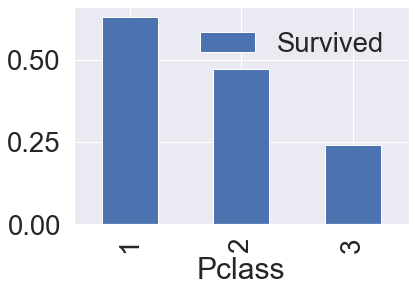

In [29]:
'''
df_train[['Pclass', 'Survived']]     -> 이거를
.groupby(['Pclass'], as_index=True)  -> 인덱스가 있는 채로 Pclass로 그룹바이
** groupby [ split - apply - combine ] => 기준열을 지정해서 특정열을 그룹별로 나눈다. 
   -> 이후에 통계함수를 적용시켜야 한다.
.mean() -> 통계
.sort_values(by='Survived', ascending=False) -> Survived가 내림차순으로(default = 오름차순)
'''
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

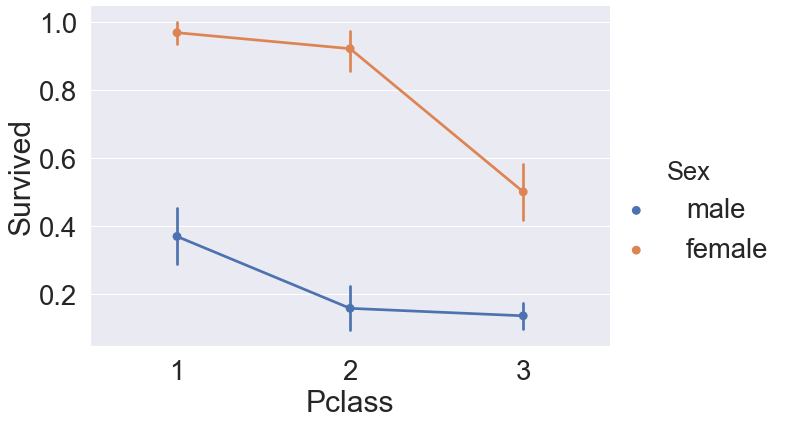

In [27]:
# 성별을 기준으로 Pclass를 x축, Survived를 y축
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

# 여자가 생존율이 높은데, 클래스가 높을수록 더 높다.
# 남자도 클래스쪽은 비례한다.

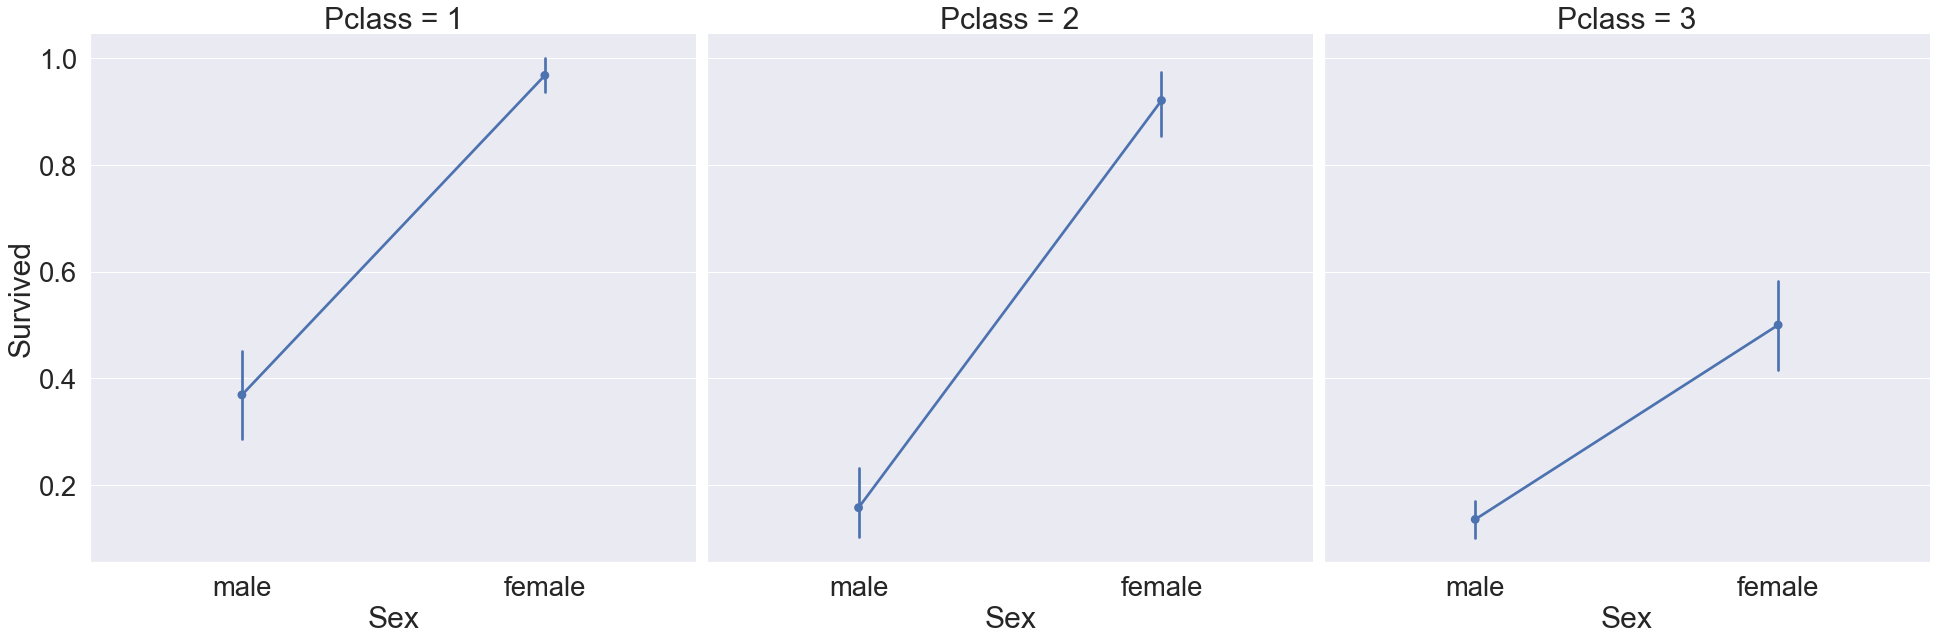

In [28]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1
              )

## AGE로 보기

In [29]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


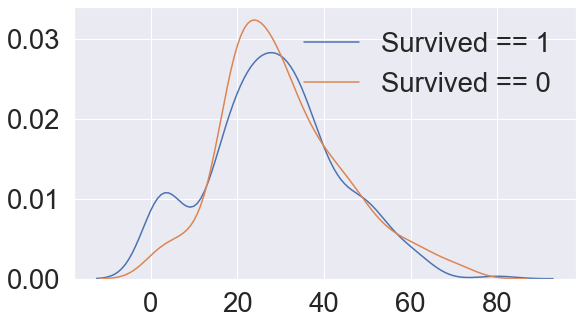

In [37]:
# 히스토그램 ( histogram )
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0']) # 선 그래프 명명
plt.show()

# 생존자 중에서 나이 어린쪽이 더 많았다.

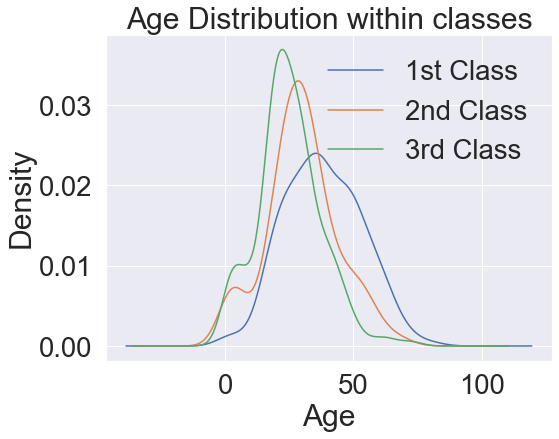

In [38]:
# Age distribution withing classes
# x축에 Age, 선그래프는 Pclass별로 => 나이대별로 클래스 분포
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

# 어릴수록 Pclass가 낮은 비율이 더 크다.

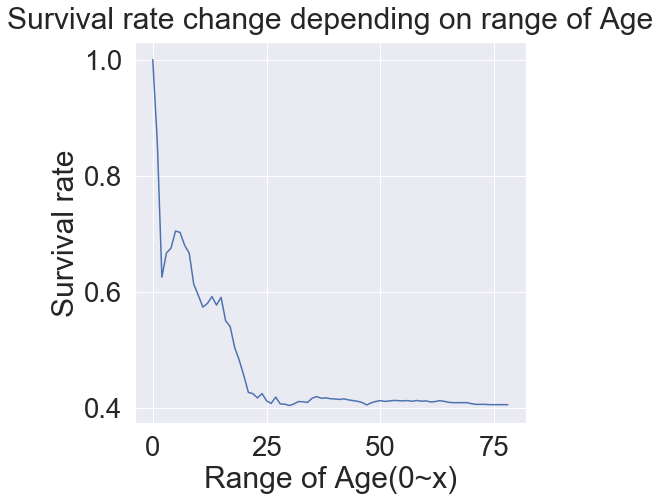

In [41]:
cummulate_survival_ratio = []
for i in range(1, 80):
    tmp = df_train[df_train['Age'] < i]['Survived']
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
#     cummulate_survival_ratio.append(tmp.sum() / len(tmp))
# i 나이보다 어리면서  생존한 인원 / i 나이보다 어린 인원의 숫자
# 25살 이하 생존 인원 / 25살 이하 인원

# 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

# 10살 이하의 생존 인원 / 10살 이하의 총 인원

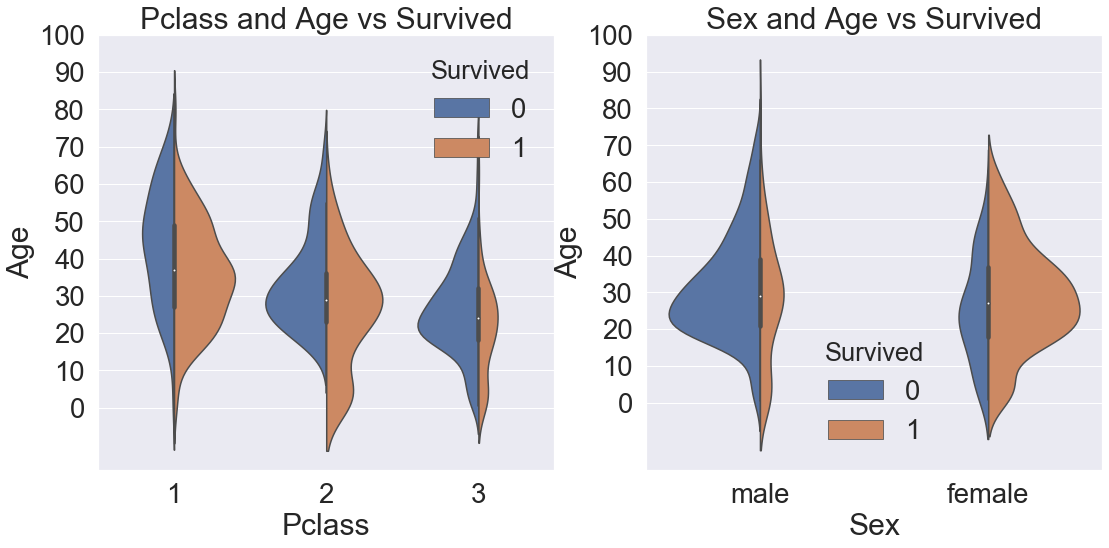

In [45]:
# 복합적으로 보고 싶을 때
# violinplot ( 바이올린 )
# x축, y축, hue=차트 표현 값, split => 붙힐지, 띄울지

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# 클래스가 높을수록 연령대가 많고,
# 클래스가 높을수록 생존율이 높다.
# 연령대가 낮을수록 생존율이 높다.
# 여성이 생존율이 높고,
# 남성이 연령대가 넓게 분포되있다.
# => 여성과 아이 우선 ?

## Embarked ( 탑승한 항구 )

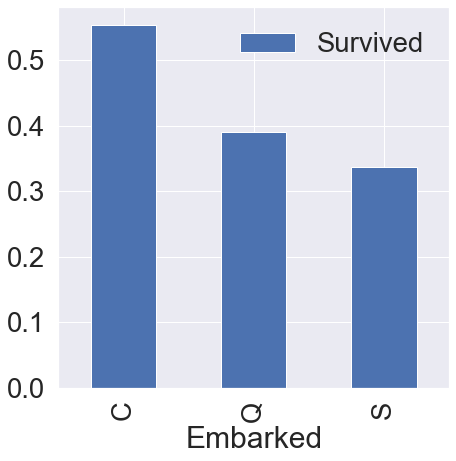

In [49]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

# 'Embarked', 'Survived'를 가져오고 / 그룹바이를 'Embarked'로 하는데, 이를 인덱스로 (x축 값) / 평균내고 정렬시키고  barplot
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

# C항구 탑승인원이 생존이 더 많다.

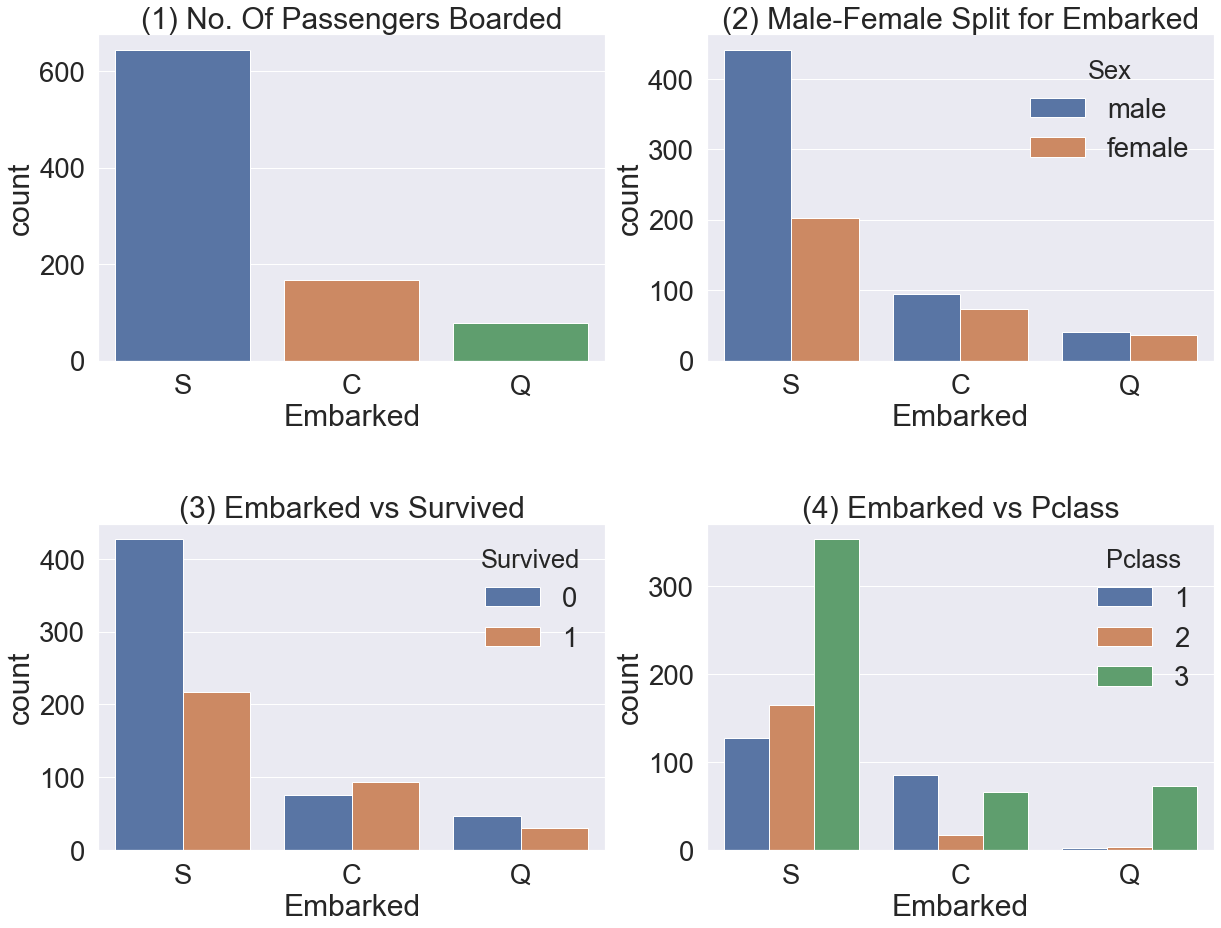

In [54]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

# Embarked와 다른 열간의 상관관계 찾기

# 단순히 Embarked 카운트
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

# 성별 기준으로 카운트
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

# 생존 기준으로 카운트
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

# 클래스 기준으로 카운트
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# S에서 가장 많이 탑승했다. 눈에 띌 정도로

# S에서 남성탑승수가 많다.
# C와 Q는 비슷하다.

# C에서만 생존수가 사망수보다 크다.
# S에서는 사망비율이 눈에 띄게 크다.

# Q는 3등석밖에 없고
# C는 1등석 비율이 많고 => 다른 항구에 비해 생존율이 높은 이유
# S는 골고루 있지만 3등석이 가장 많다.

## SibSp(형제, 자매) , Parch(부모, 자녀) - Family
- SibSp와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅시다

In [56]:
# 새로운 열 추가 => family로 바꿔주면서
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [57]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


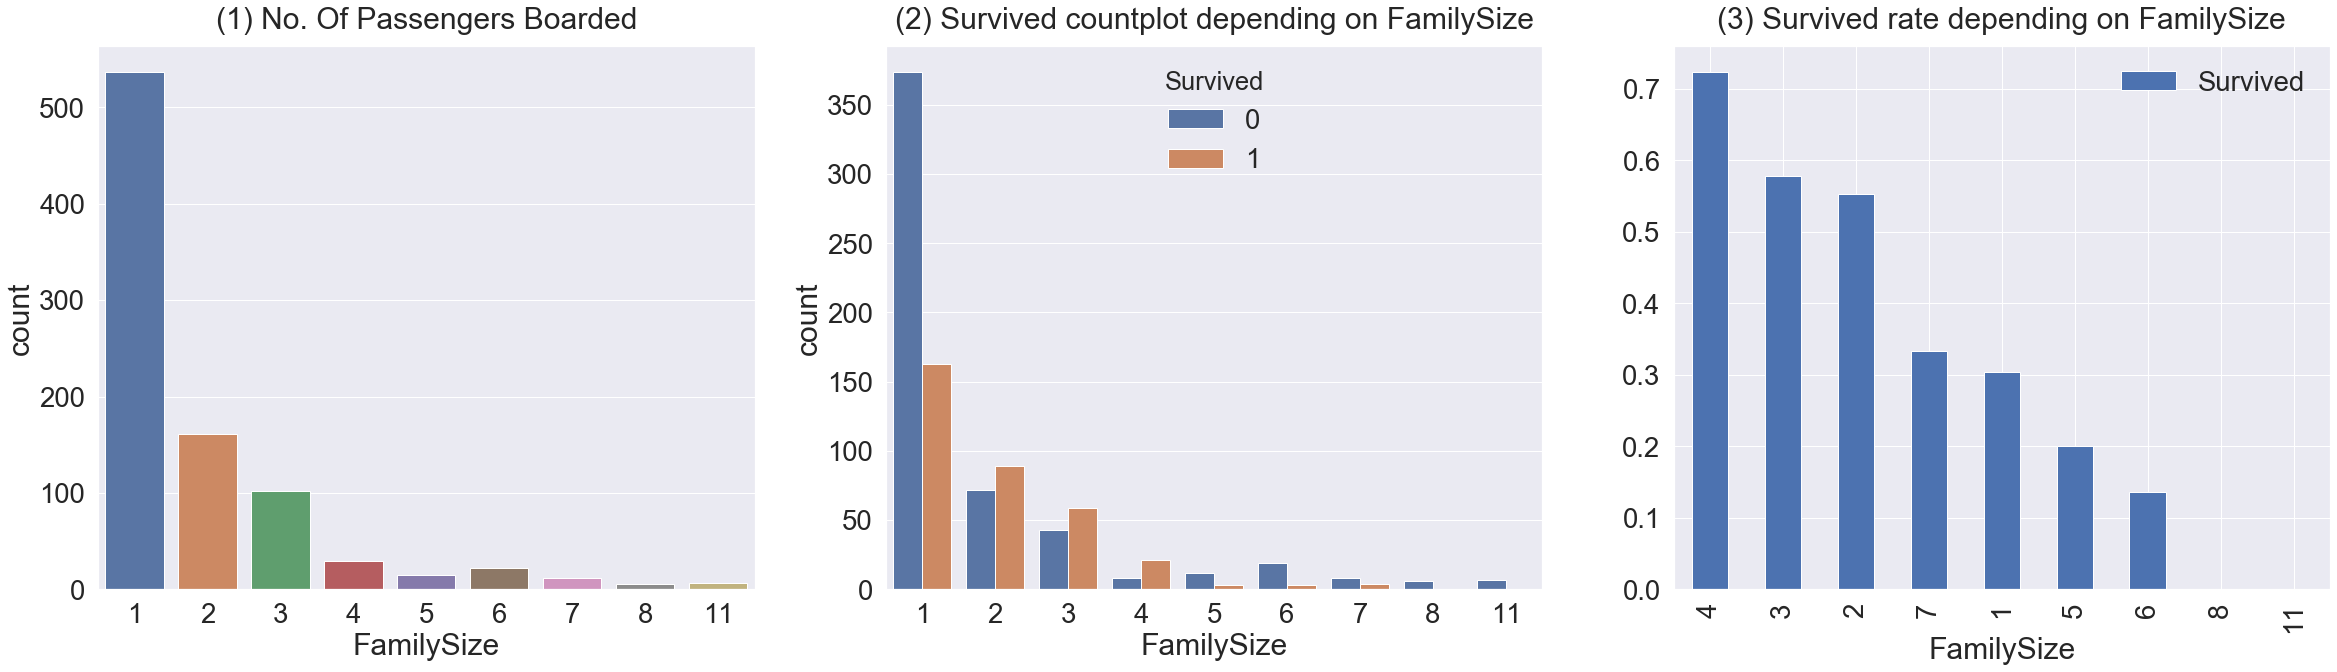

In [59]:
f,ax=plt.subplots(1, 3, figsize=(40,10))


# 단순히 FamilySize의 분포
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

# 생존자, 사망자 카운트
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

# 생존자 비율 정렬
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 혼자가 가장 많고 점점 적어진다.

# 혼자는 생존율이 적고 가족이 있을 때 생존율이  높다.
# 너무 많으면 표본이 적어져서 ? 낮다.

# 4명, 3명, 2명 순으로 생존율이 높다

### Fare
- Fare 는 탑승요금이며, contious feature ( 연속형 변수 )

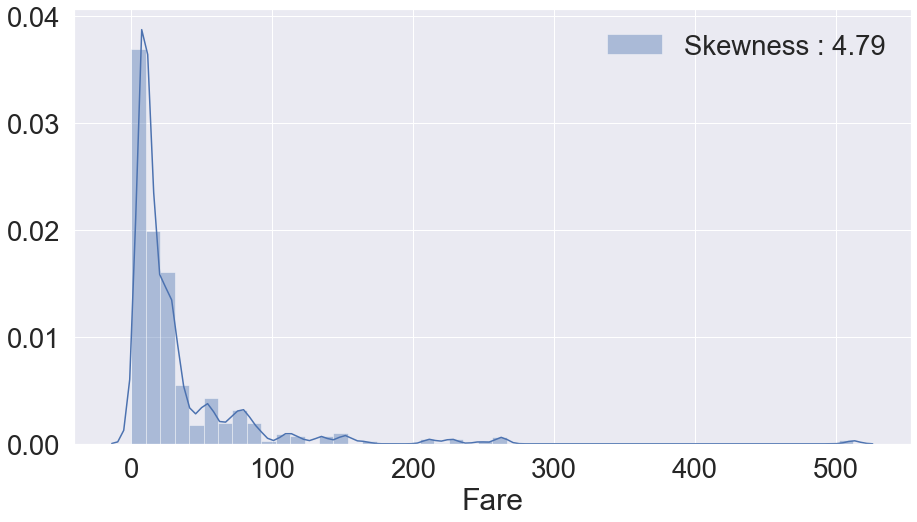

In [71]:
# 히스토그램 ( histogram )
# Skewness => 비대칭도
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 굉장히 비대칭적( high skewness )이다.
# 이대로 사용할 시 모델 학습이 잘못될 수 있다. ( outlier에 민감 ) => 예측에 안좋은 영향
# Fare에 log를 사용한다.

In [72]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

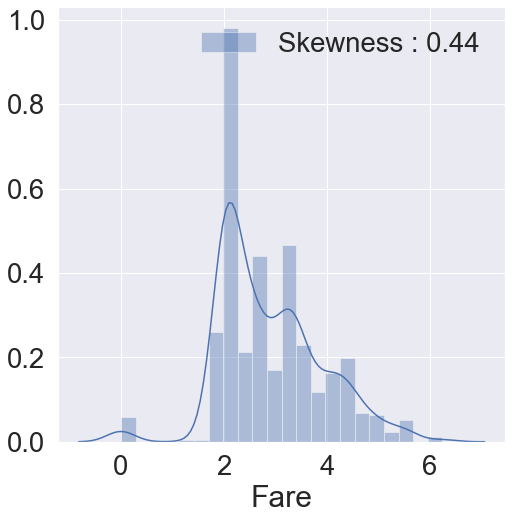

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- feature engineering : 모델 학습을 위해, 성능을 높이기 위해 feature들을 조작, 추가 하는 것  
  => 모델의 성능을 높이기 위함!

## Cabin
- NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.
- So, pass

## Ticket
- NaN 은 없다.
- string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요하다.
- 이는 각자의 역량에 맡긴다.

In [75]:
df_train['Ticket'].value_counts()

CA. 2343              7
347082                7
1601                  7
3101295               6
CA 2144               6
                     ..
324669                1
SOTON/O.Q. 3101307    1
350047                1
STON/O2. 3101283      1
28206                 1
Name: Ticket, Length: 681, dtype: int64